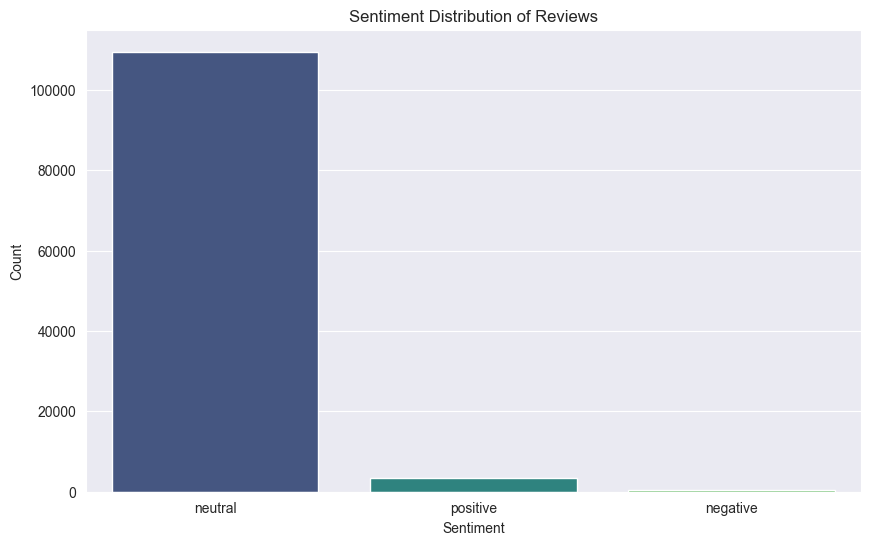

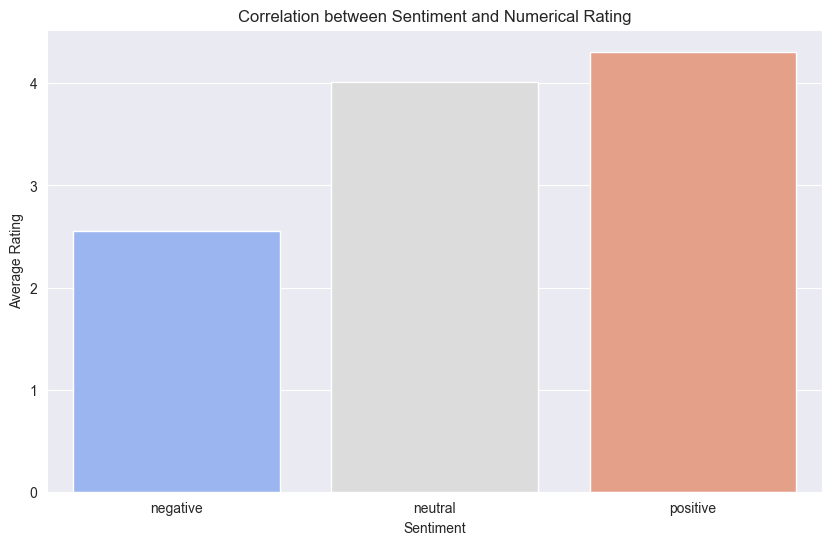

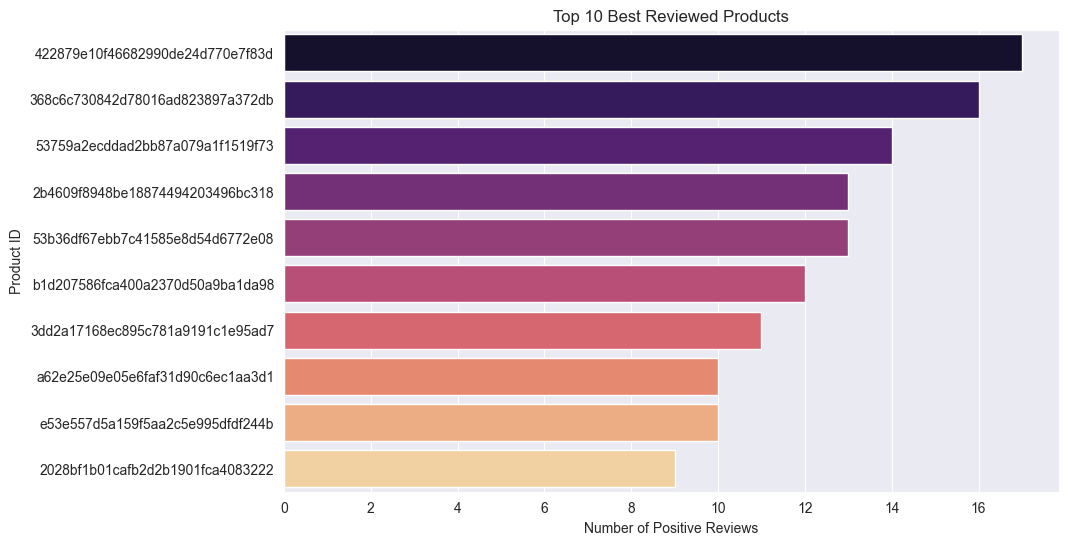

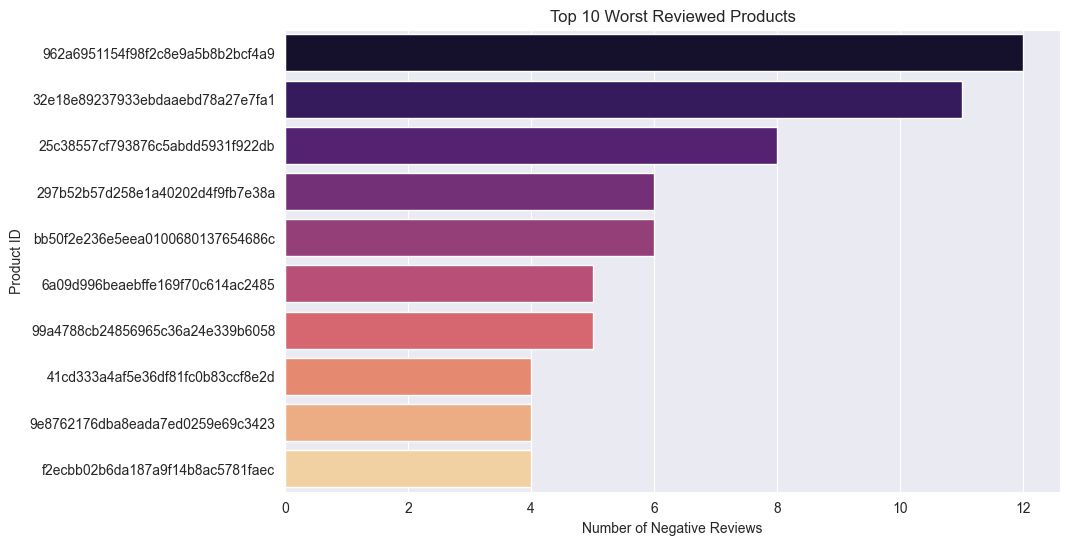

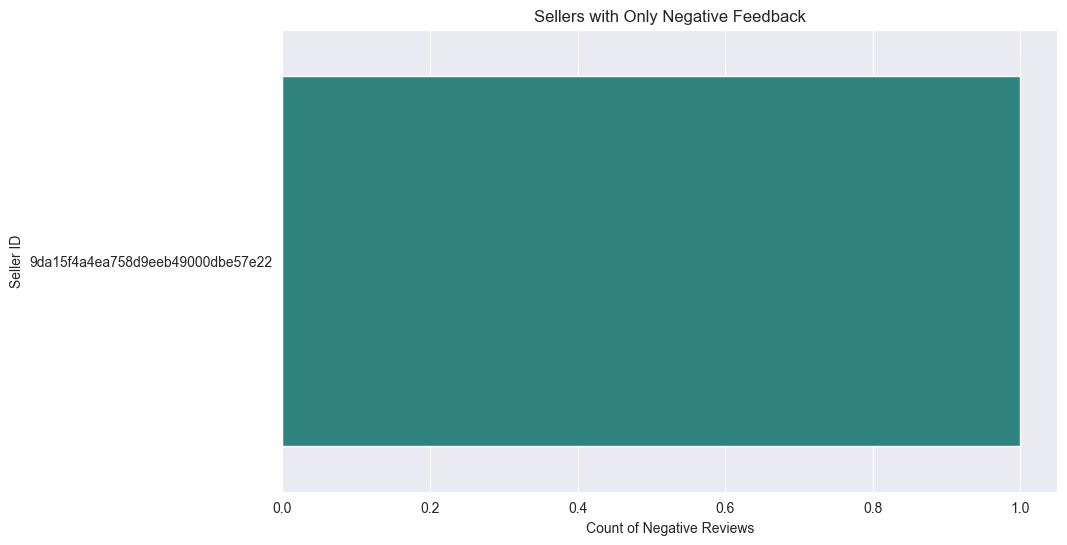

### Top 10 Best Reviewed Products

,product_id,0,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,422879e10f46682990de24d770e7f83d,17,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,22.0,30.0
1,368c6c730842d78016ad823897a372db,16,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
2,53759a2ecddad2bb87a079a1f1519f73,14,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0
3,2b4609f8948be18874494203496bc318,13,beleza_saude,59.0,492.0,3.0,250.0,22.0,10.0,18.0
4,53b36df67ebb7c41585e8d54d6772e08,13,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0
5,b1d207586fca400a2370d50a9ba1da98,12,NaN,NaN,NaN,NaN,350.0,16.0,4.0,11.0
6,3dd2a17168ec895c781a9191c1e95ad7,11,informatica_acessorios,48.0,894.0,1.0,533.0,22.0,11.0,20.0
7,a62e25e09e05e6faf31d90c6ec1aa3d1,10,relogios_presentes,58.0,3006.0,2.0,1000.0,53.0,8.0,18.0
8,e53e557d5a159f5aa2c5e995dfdf244b,10,informatica_acessorios,33.0,256.0,1.0,180.0,17.0,10.0,13.0
9,2028bf1b01cafb2d2b1901fca4083222,9,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0


### Top 10 Worst Reviewed Products

,product_id,0,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,962a6951154f98f2c8e9a5b8b2bcf4a9,12,moveis_decoracao,47.0,610.0,1.0,2550.0,30.0,35.0,30.0
1,32e18e89237933ebdaaebd78a27e7fa1,11,utilidades_domesticas,48.0,464.0,1.0,1400.0,26.0,41.0,26.0
2,25c38557cf793876c5abdd5931f922db,8,bebes,58.0,1447.0,5.0,15800.0,38.0,62.0,57.0
3,297b52b57d258e1a40202d4f9fb7e38a,6,beleza_saude,44.0,1482.0,2.0,150.0,20.0,17.0,21.0
4,bb50f2e236e5eea0100680137654686c,6,beleza_saude,60.0,2644.0,6.0,400.0,34.0,4.0,22.0
5,6a09d996beaebffe169f70c614ac2485,5,informatica_acessorios,57.0,317.0,1.0,170.0,23.0,11.0,26.0
6,99a4788cb24856965c36a24e339b6058,5,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0
7,41cd333a4af5e36df81fc0b83ccf8e2d,4,bebes,59.0,867.0,3.0,10750.0,38.0,47.0,44.0
8,9e8762176dba8eada7ed0259e69c3423,4,telefonia,60.0,296.0,2.0,150.0,16.0,11.0,11.0
9,f2ecbb02b6da187a9f14b8ac5781faec,4,perfumaria,54.0,935.0,1.0,50.0,16.0,5.0,11.0


### Sellers with Only Negative Feedback

,seller_id,negative_reviews,total_reviews
162,9da15f4a4ea758d9eeb49000dbe57e22,1,1


### Correlation between Sentiment and Numerical Rating

,sentiment,review_score
0,negative,2.556008
1,neutral,4.012973
2,positive,4.309199


Comment: The product quality was great but the price was too high.
Sentiment: positive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from IPython.display import display, Markdown

# Load data
sellers = pd.read_csv(r'C:\Users\pc\Desktop\python test\S_Data\sellers.csv')
products = pd.read_csv(r'C:\Users\pc\Desktop\python test\S_Data\products.csv')
order_items = pd.read_csv(r'C:\Users\pc\Desktop\python test\S_Data\order_items.csv')
orders = pd.read_csv(r'C:\Users\pc\Desktop\python test\S_Data\orders.csv')
order_reviews = pd.read_csv(r'C:\Users\pc\Desktop\python test\S_Data\order_reviews.csv')
product_category_name_translation = pd.read_csv(r'C:\Users\pc\Desktop\python test\S_Data\product_category_name_translation.csv')

# Merge datasets
reviews_data = order_reviews.merge(orders, on='order_id', how='inner')
reviews_data = reviews_data.merge(order_items, on='order_id', how='inner')
reviews_data = reviews_data.merge(products, on='product_id', how='inner')
reviews_data = reviews_data.merge(sellers, on='seller_id', how='inner')

# Filter relevant columns
reviews_data = reviews_data[['review_id', 'order_id', 'review_score', 'review_comment_message', 'product_id', 'product_category_name', 'seller_id']]

# Function to classify sentiment using TextBlob
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
reviews_data['sentiment'] = reviews_data['review_comment_message'].apply(lambda x: classify_sentiment(str(x)))

# Correlation between sentiment and numerical rating
sentiment_rating_correlation = reviews_data.groupby('sentiment')['review_score'].mean().reset_index()

# Products with the best and worst reviews
best_reviewed_products = reviews_data[reviews_data['sentiment'] == 'positive'].groupby('product_id').size().nlargest(10).reset_index()
worst_reviewed_products = reviews_data[reviews_data['sentiment'] == 'negative'].groupby('product_id').size().nlargest(10).reset_index()

# Merge with product details
best_reviewed_products = best_reviewed_products.merge(products, on='product_id', how='inner')
worst_reviewed_products = worst_reviewed_products.merge(products, on='product_id', how='inner')

# Sellers with only negative feedback
negative_feedback_sellers = reviews_data[reviews_data['sentiment'] == 'negative'].groupby('seller_id').size().reset_index()
negative_feedback_sellers.columns = ['seller_id', 'negative_reviews']
total_reviews_per_seller = reviews_data.groupby('seller_id').size().reset_index()
total_reviews_per_seller.columns = ['seller_id', 'total_reviews']
negative_feedback_sellers = negative_feedback_sellers.merge(total_reviews_per_seller, on='seller_id')
negative_feedback_sellers = negative_feedback_sellers[negative_feedback_sellers['negative_reviews'] == negative_feedback_sellers['total_reviews']]

# Function to highlight price mentions
def highlight_price_mentions(text):
    price_mentions = re.findall(r'\b\d+\.\d{2}\b', text)
    return ', '.join(price_mentions)

# Apply function
reviews_data['price_mentions'] = reviews_data['review_comment_message'].apply(lambda x: highlight_price_mentions(str(x)))

# Visualizations

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews_data, x='sentiment', hue='sentiment', palette='viridis', dodge=False, legend=False)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Correlation between sentiment and numerical rating
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_rating_correlation, x='sentiment', y='review_score', hue='sentiment', palette='coolwarm', dodge=False, legend=False)
plt.title('Correlation between Sentiment and Numerical Rating')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

# Best reviewed products
plt.figure(figsize=(10, 6))
sns.barplot(data=best_reviewed_products, x=0, y='product_id', hue='product_id', palette='magma', dodge=False, legend=False)
plt.title('Top 10 Best Reviewed Products')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product ID')
plt.show()

# Worst reviewed products
plt.figure(figsize=(10, 6))
sns.barplot(data=worst_reviewed_products, x=0, y='product_id', hue='product_id', palette='magma', dodge=False, legend=False)
plt.title('Top 10 Worst Reviewed Products')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Product ID')
plt.show()

# Negative feedback sellers
plt.figure(figsize=(10, 6))
sns.countplot(data=negative_feedback_sellers, y='seller_id', hue='seller_id', palette='viridis', dodge=False, legend=False)
plt.title('Sellers with Only Negative Feedback')
plt.xlabel('Count of Negative Reviews')
plt.ylabel('Seller ID')
plt.show()

# Display analytics in Markdown format
display(Markdown("### Top 10 Best Reviewed Products"))
display(best_reviewed_products)
display(Markdown("### Top 10 Worst Reviewed Products"))
display(worst_reviewed_products)
display(Markdown("### Sellers with Only Negative Feedback"))
display(negative_feedback_sellers)
display(Markdown("### Correlation between Sentiment and Numerical Rating"))
display(sentiment_rating_correlation)

# Text Comment Classifier
def classify_text_comment(comment):
    sentiment = classify_sentiment(comment)
    return sentiment

# Example usage
example_comment = "The product quality was great but the price was too high."
print(f"Comment: {example_comment}")
print(f"Sentiment: {classify_text_comment(example_comment)}")
